In [7]:
! conda

usage: conda [-h] [-v] [--no-plugins] [-V] COMMAND ...

conda is a tool for managing and deploying applications, environments and packages.

options:
  -h, --help          Show this help message and exit.
  -v, --verbose       Can be used multiple times. Once for detailed output,
                      twice for INFO logging, thrice for DEBUG logging, four
                      times for TRACE logging.
  --no-plugins        Disable all plugins that are not built into conda.
  -V, --version       Show the conda version number and exit.

commands:
  The following built-in and plugins subcommands are available.

  COMMAND
    activate          Activate a conda environment.
    build             Build conda packages from a conda recipe.
    clean             Remove unused packages and caches.
    compare           Compare packages between conda environments.
    config            Modify configuration values in .condarc.
    content-trust     Signing and verification tools for Conda
    conv

In [8]:
pip


Usage:   
  /opt/anaconda3/bin/python -m pip <command> [options]

Commands:
  install                     Install packages.
  download                    Download packages.
  uninstall                   Uninstall packages.
  freeze                      Output installed packages in requirements format.
  inspect                     Inspect the python environment.
  list                        List installed packages.
  show                        Show information about installed packages.
  check                       Verify installed packages have compatible dependencies.
  config                      Manage local and global configuration.
  search                      Search PyPI for packages.
  cache                       Inspect and manage pip's wheel cache.
  index                       Inspect information available from package indexes.
  wheel                       Build wheels from your requirements.
  hash                        Compute hashes of package archives.
  completion

In [9]:
pip install pymc

Note: you may need to restart the kernel to use updated packages.


In [10]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [11]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [12]:
import arviz as az
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [13]:
%config InlineBackend.figure_format = 'retina'
# Initialize random number generator
RANDOM_SEED = 8927
rng = np.random.default_rng(RANDOM_SEED)
az.style.use("arviz-darkgrid")

In [14]:
# True parameter values
alpha, sigma = 1, 1
beta = [1, 2.5]

# Size of dataset
size = 100

# Predictor variable
X1 = np.random.randn(size)
X2 = np.random.randn(size) * 0.2

# Simulate outcome variable
Y = alpha + beta[0] * X1 + beta[1] * X2 + rng.normal(size=size) * sigma

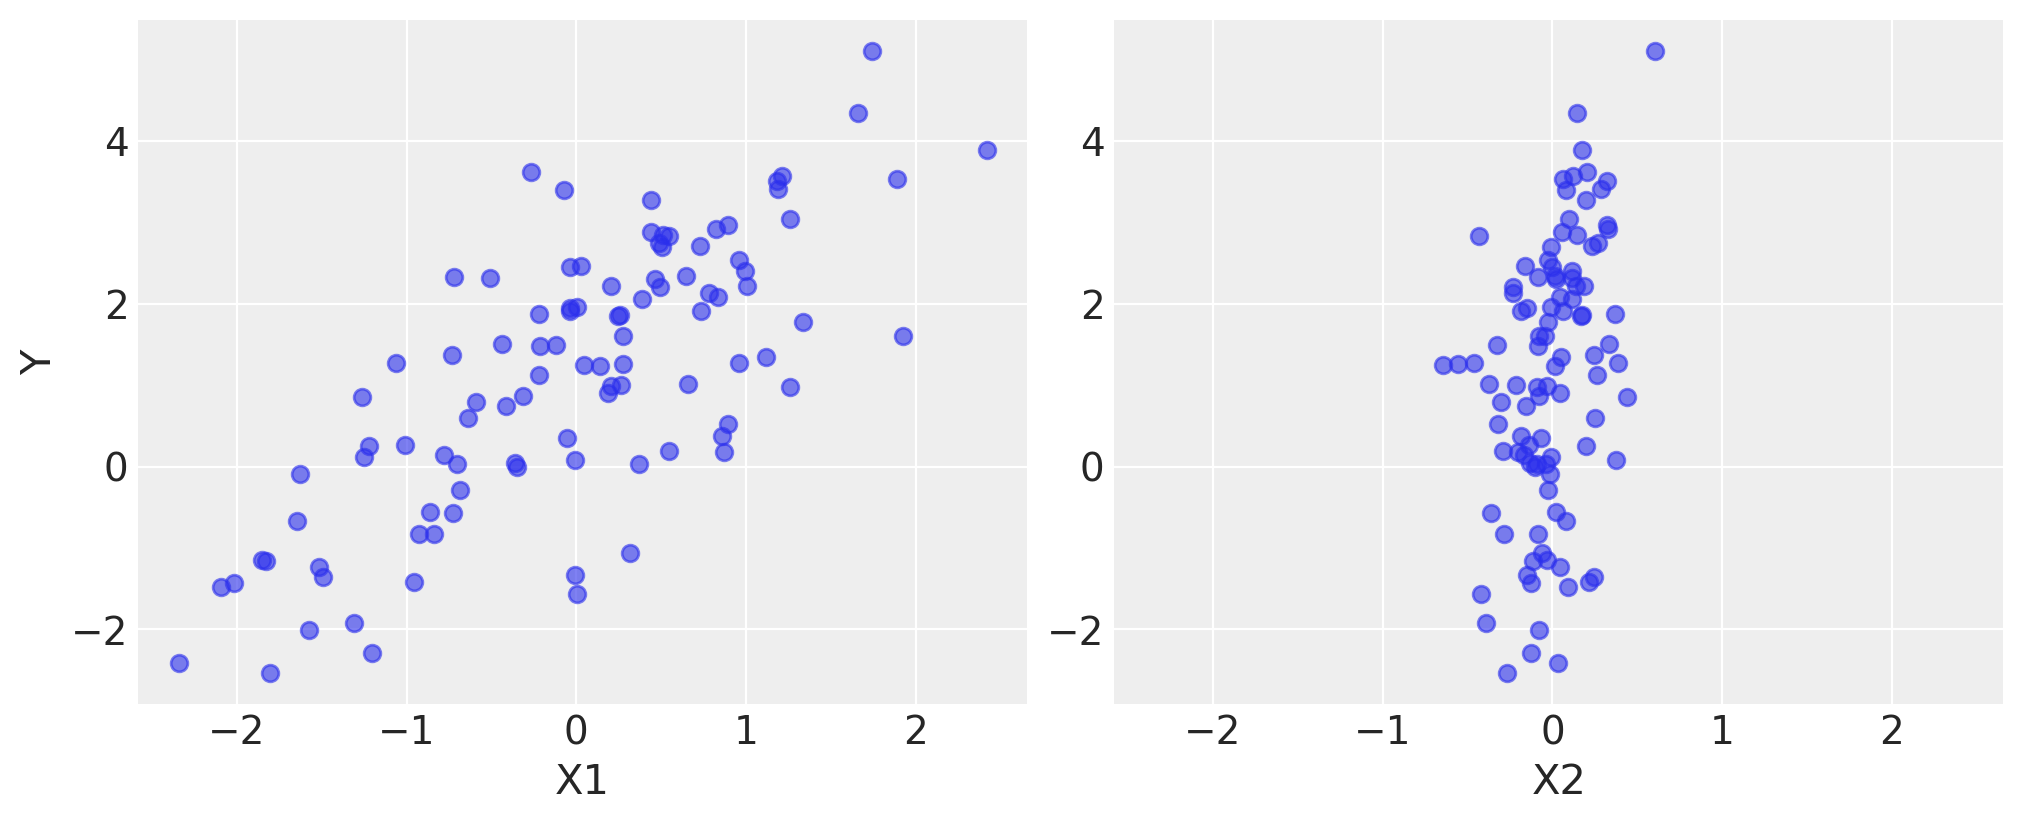

In [15]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(10, 4))
axes[0].scatter(X1, Y, alpha=0.6)
axes[1].scatter(X2, Y, alpha=0.6)
axes[0].set_ylabel("Y")
axes[0].set_xlabel("X1")
axes[1].set_xlabel("X2");

In [16]:
import pymc as pm

print(f"Running on PyMC v{pm.__version__}")


Running on PyMC v5.15.0


In [17]:
basic_model = pm.Model()

with basic_model:
    # Priors for unknown model parameters
    alpha = pm.Normal("alpha", mu=0, sigma=10)
    beta = pm.Normal("beta", mu=0, sigma=10, shape=2)
    sigma = pm.HalfNormal("sigma", sigma=1)

    # Expected value of outcome
    mu = alpha + beta[0] * X1 + beta[1] * X2

    # Likelihood (sampling distribution) of observations
    Y_obs = pm.Normal("Y_obs", mu=mu, sigma=sigma, observed=Y)

In [18]:
with basic_model:
    # draw 1000 posterior samples
    idata = pm.sample()

Sampling 4 chains, 0 divergences ━━━━━╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━  15% 0:00:21 / 0:00:03

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Sampling 4 chains, 0 divergences ━━━━━━━━━━━━━━━━━╸━━━━━━━━━━━━━━━━━━━━━━  45% 0:00:14 / 0:00:10

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 48 seconds.


In [19]:
idata

Inference data with groups:
	> posterior
	> sample_stats
	> observed_data

In [20]:
idata.posterior["alpha"].sel(draw=slice(0,4))

<xarray.DataArray 'alpha' (chain: 4, draw: 5)>
array([[1.02805475, 1.30939145, 1.04062326, 1.14400248, 1.33666759],
       [1.16293711, 1.14200538, 1.18218581, 1.0602387 , 1.07677723],
       [1.06304584, 1.22589093, 1.19080505, 1.12646728, 1.11606851],
       [1.25637002, 1.04955936, 1.18029618, 1.22590848, 1.11240583]])
Coordinates:
  * chain    (chain) int64 0 1 2 3
  * draw     (draw) int64 0 1 2 3 4

In [22]:
with basic_model:
    # instantiate sampler
    step = pm.Slice()

    # draw 5000 posterior samples
    slice_idata = pm.sample(5000, step=step)

Sampling 4 chains, 0 divergences ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸━━━━  89% 0:00:07 / 0:00:56

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Sampling 4 chains for 1_000 tune and 5_000 draw iterations (4_000 + 20_000 draws total) took 91 seconds.


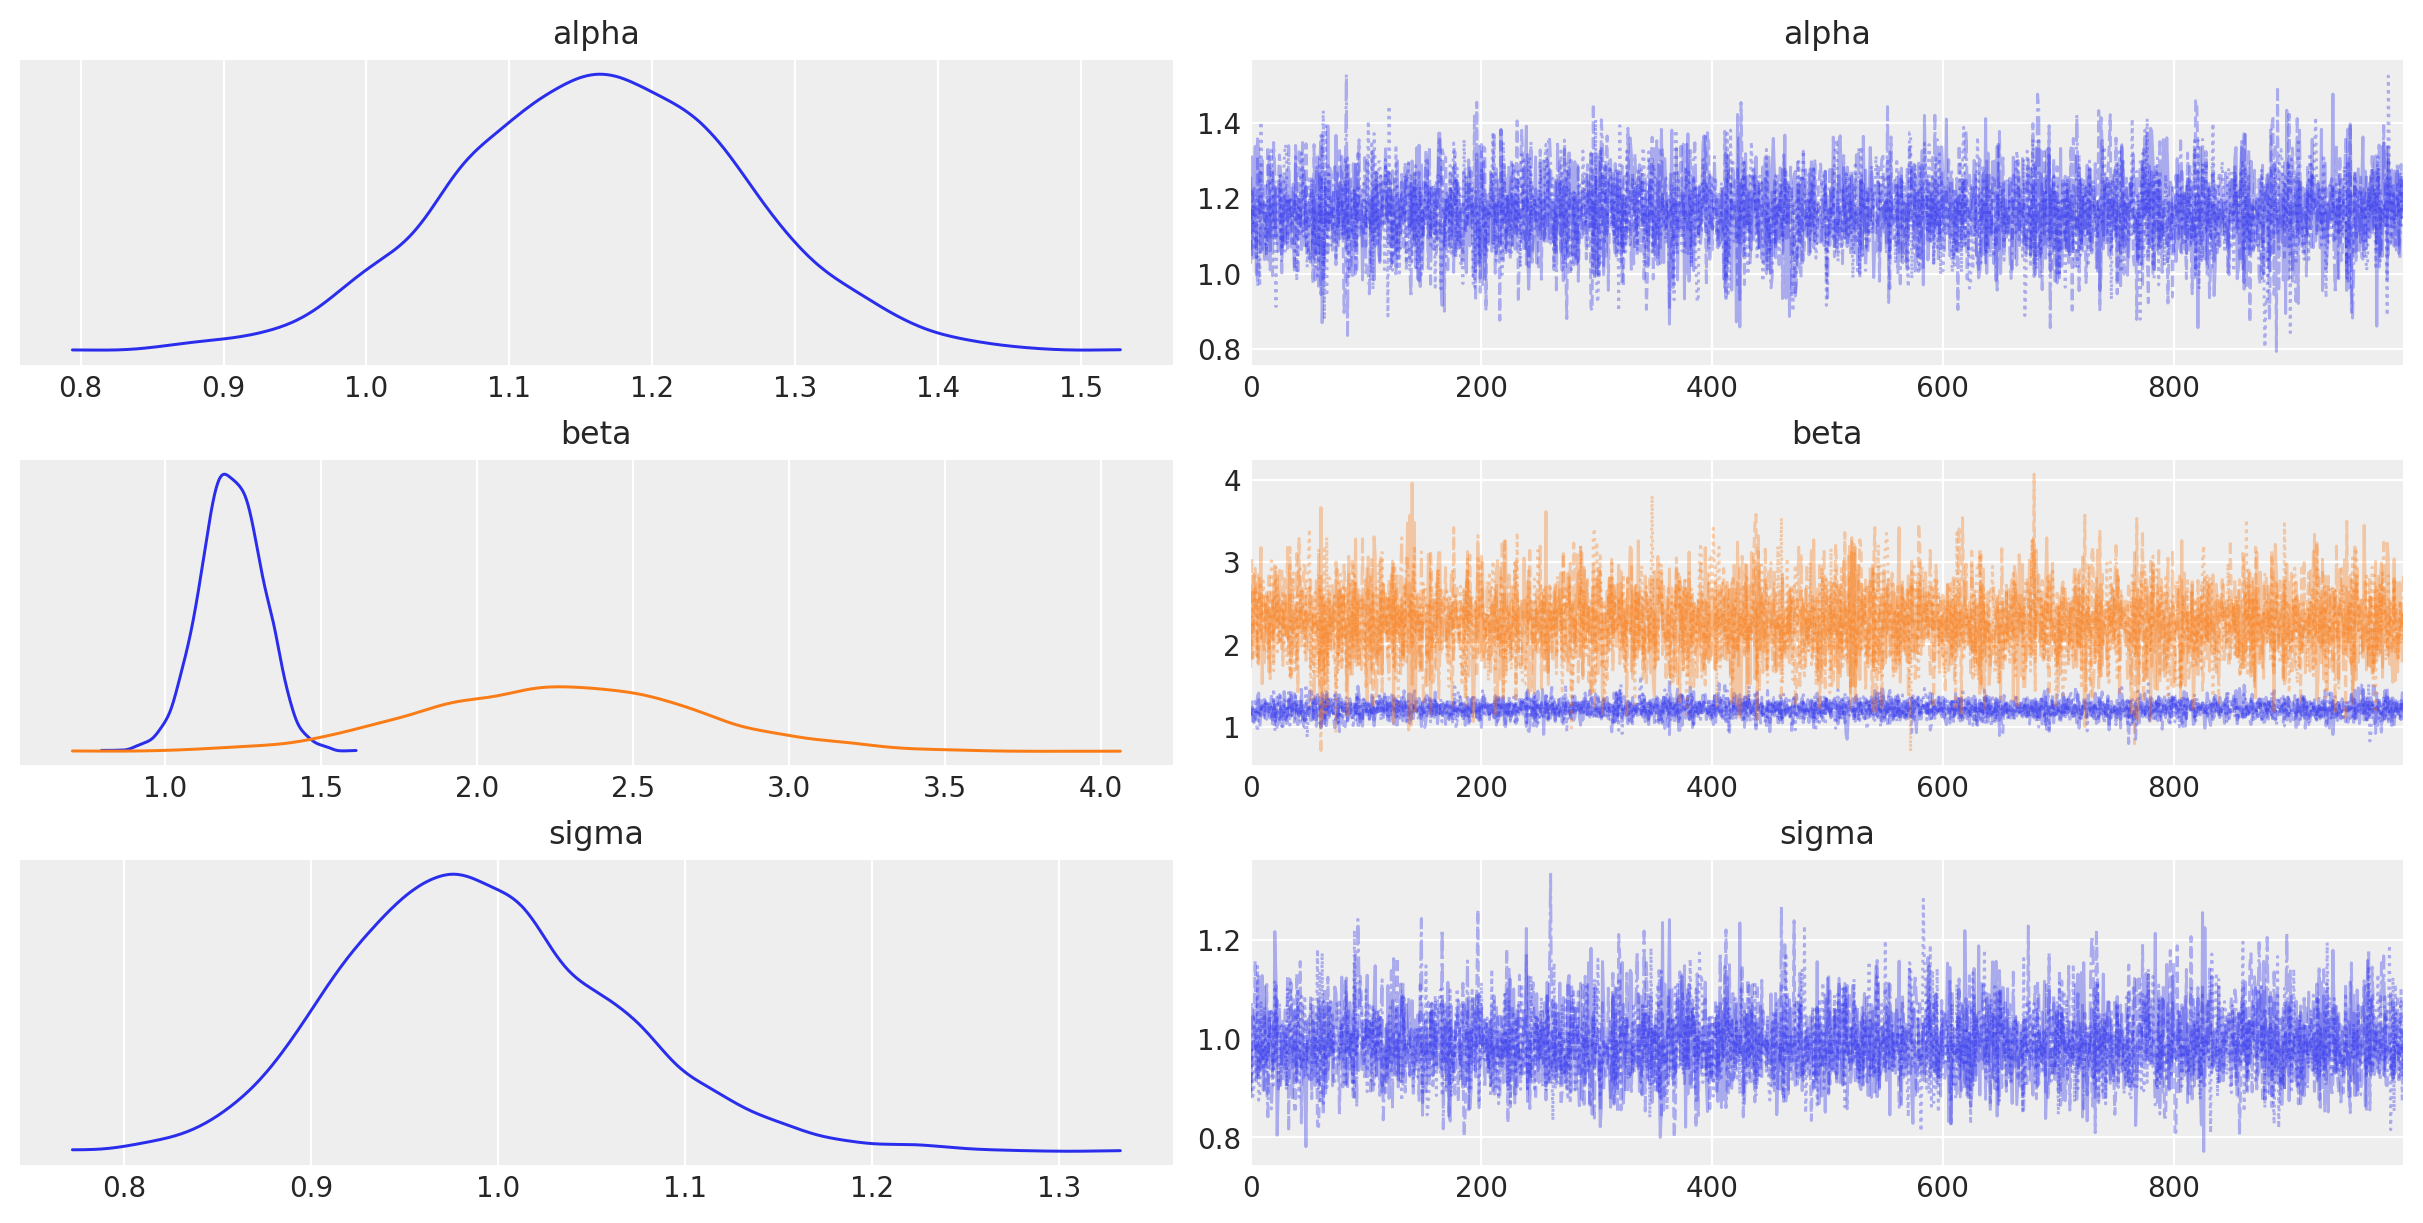

In [27]:
az.plot_trace(idata, combined=True);

In [28]:
az.summary(idata, round_to=2)

mean    sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
alpha    1.16  0.10    0.98     1.36       0.00      0.0   6649.36   3159.04   
beta[0]  1.21  0.10    1.03     1.40       0.00      0.0   5779.46   3007.70   
beta[1]  2.27  0.44    1.47     3.12       0.01      0.0   5698.31   3037.01   
sigma    0.99  0.07    0.86     1.13       0.00      0.0   6195.94   3197.29   

         r_hat  
alpha      1.0  
beta[0]    1.0  
beta[1]    1.0  
sigma      1.0

In [29]:
test_scores = pd.read_csv(pm.get_data("test_scores.csv"), index_col=0)
test_scores.head()

score  male  siblings  family_inv  non_english  prev_disab  age_test  \
0     40     0       2.0         2.0        False         NaN        55   
1     31     1       0.0         NaN        False         0.0        53   
2     83     1       1.0         1.0         True         0.0        52   
3     75     0       3.0         NaN        False         0.0        55   
5     62     0       0.0         4.0        False         1.0        50   

   non_severe_hl  mother_hs  early_ident  non_white  
0            1.0        NaN        False      False  
1            0.0        0.0        False      False  
2            1.0        NaN        False       True  
3            0.0        1.0        False      False  
5            0.0        NaN        False      False

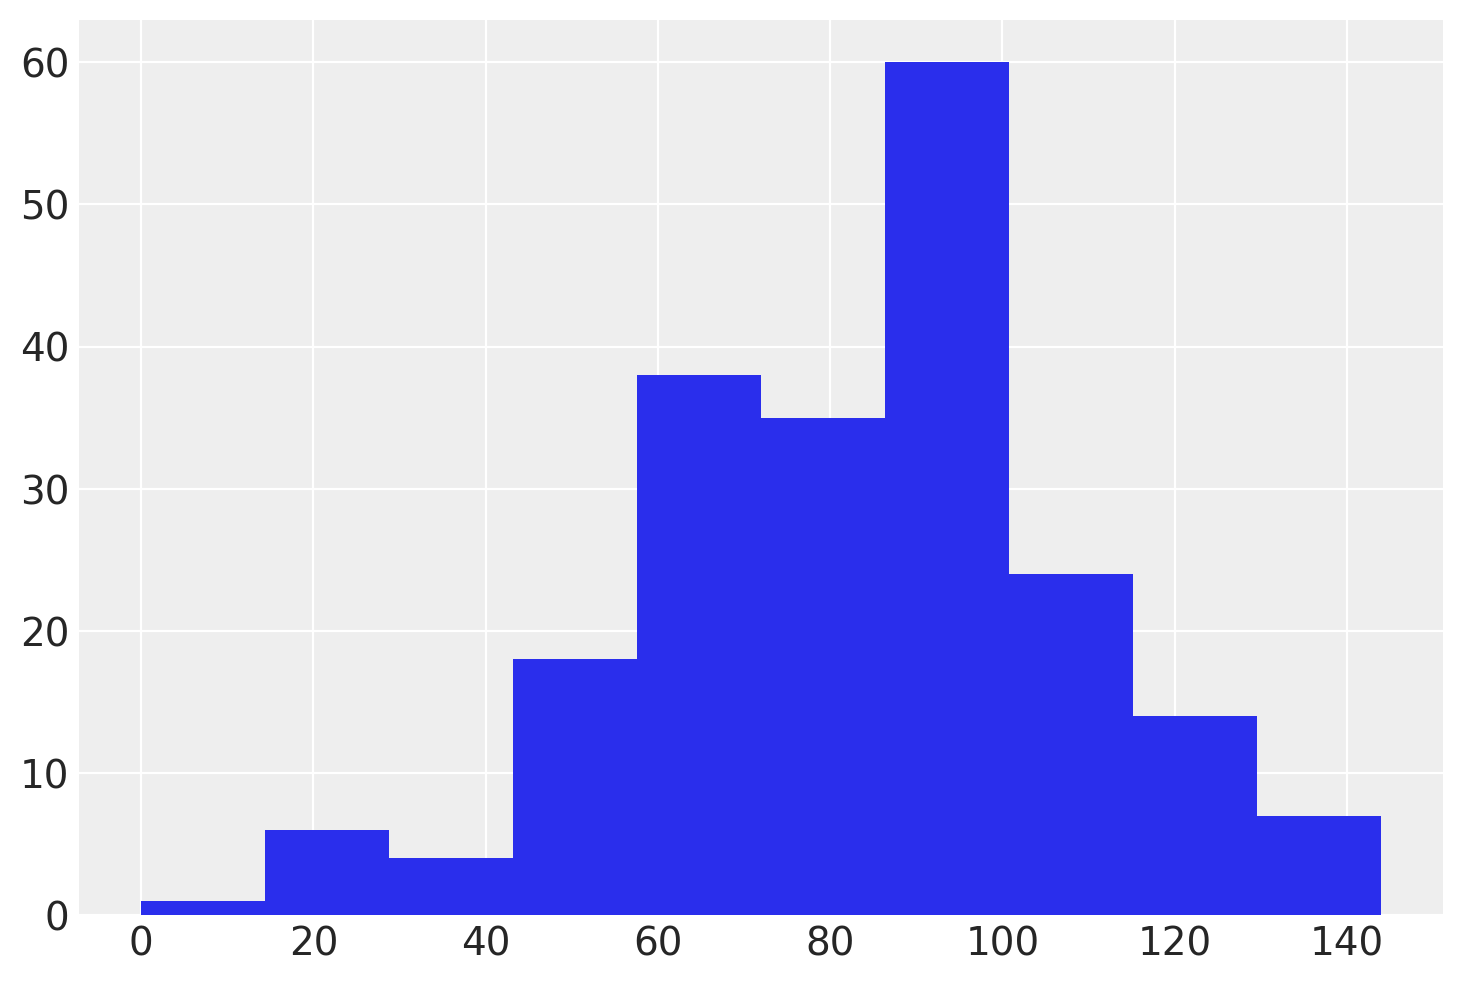

In [30]:
test_scores["score"].hist();

In [31]:
# Dropping missing values is a very bad idea in general, but we do so here for simplicity
X = test_scores.dropna().astype(float)
y = X.pop("score")

# Standardize the features
X -= X.mean()
X /= X.std()

N, D = X.shape

In [32]:
D0 = int(D / 2)

In [33]:
import pytensor.tensor as at

with pm.Model(coords={"predictors": X.columns.values}) as test_score_model:
    # Prior on error SD
    sigma = pm.HalfNormal("sigma", 25)

    # Global shrinkage prior
    tau = pm.HalfStudentT("tau", 2, D0 / (D - D0) * sigma / np.sqrt(N))
    # Local shrinkage prior
    lam = pm.HalfStudentT("lam", 5, dims="predictors")
    c2 = pm.InverseGamma("c2", 1, 1)
    z = pm.Normal("z", 0.0, 1.0, dims="predictors")
    # Shrunken coefficients
    beta = pm.Deterministic(
        "beta", z * tau * lam * at.sqrt(c2 / (c2 + tau**2 * lam**2)), dims="predictors"
    )
    # No shrinkage on intercept
    beta0 = pm.Normal("beta0", 100, 25.0)

    scores = pm.Normal("scores", beta0 + at.dot(X.values, beta), sigma, observed=y.values)

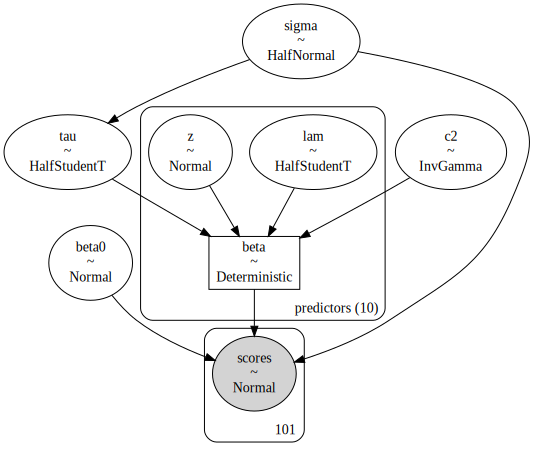

In [39]:
pm.model_to_graphviz(test_score_model)

In [38]:
conda install -c conda-forge python-graphviz

Channels:
 - conda-forge
 - defaults
Platform: osx-64
Solving environment: done

## Package Plan ##

  environment location: /opt/anaconda3

  added / updated specs:
    - python-graphviz


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    atk-1.0-2.38.0             |       h1d18e73_1         359 KB  conda-forge
    cairo-1.16.0               |       h691a603_2         935 KB
    certifi-2024.2.2           |     pyhd8ed1ab_0         157 KB  conda-forge
    expat-2.6.2                |       h73e2aa4_0         124 KB  conda-forge
    font-ttf-dejavu-sans-mono-2.37|       hab24e00_0         388 KB  conda-forge
    font-ttf-inconsolata-3.000 |       h77eed37_0          94 KB  conda-forge
    font-ttf-source-code-pro-2.038|       h77eed37_0         684 KB  conda-forge
    font-ttf-ubuntu-0.83       |       h77eed37_2         1.5 MB  conda-forge
    fontconfig-2.13.94         |       h10f422b_0

font-ttf-ubuntu-0.83 | 1.5 MB    | ##############1                       |  38% 

graphviz-2.49.0      | 3.9 MB    | #####################4                |  58% 
librsvg-2.54.4       | 7.3 MB    | ##########6                           |  29% 


openssl-3.3.0        | 2.4 MB    | #####################9                |  59% 



font-ttf-ubuntu-0.83 | 1.5 MB    | ###############################7      |  86% 

graphviz-2.49.0      | 3.9 MB    | #############################6        |  80% 
librsvg-2.54.4       | 7.3 MB    | ################1                     |  44% 



font-ttf-ubuntu-0.83 | 1.5 MB    | ##################################### | 100% 
librsvg-2.54.4       | 7.3 MB    | #####################6                |  59% 




harfbuzz-4.3.0       | 1.1 MB    | 5                                     |   1% 






font-ttf-source-code | 684 KB    | 8                                     |   2% 
gtk2-2.24.33         | 7.1 MB    | ########################8             |  67% 





lib

libgd-2.3.3          | 198 KB    | ##################################### | 100% 






















 ... (more hidden) ...






















 ... (more hidden) ...



















graphite2-1.3.14     | 82 KB     | ##################################### | 100% 



















librsvg-2.54.4       | 7.3 MB    | ##################################### | 100% 
gtk2-2.24.33         | 7.1 MB    | ##################################### | 100% 






















                                                                                
                                                                                

                                                                                


                                                                                



                                                                                




                                                                                





                         

In [40]:
with test_score_model:
    prior_samples = pm.sample_prior_predictive(100)

Sampling: [beta0, c2, lam, scores, sigma, tau, z]


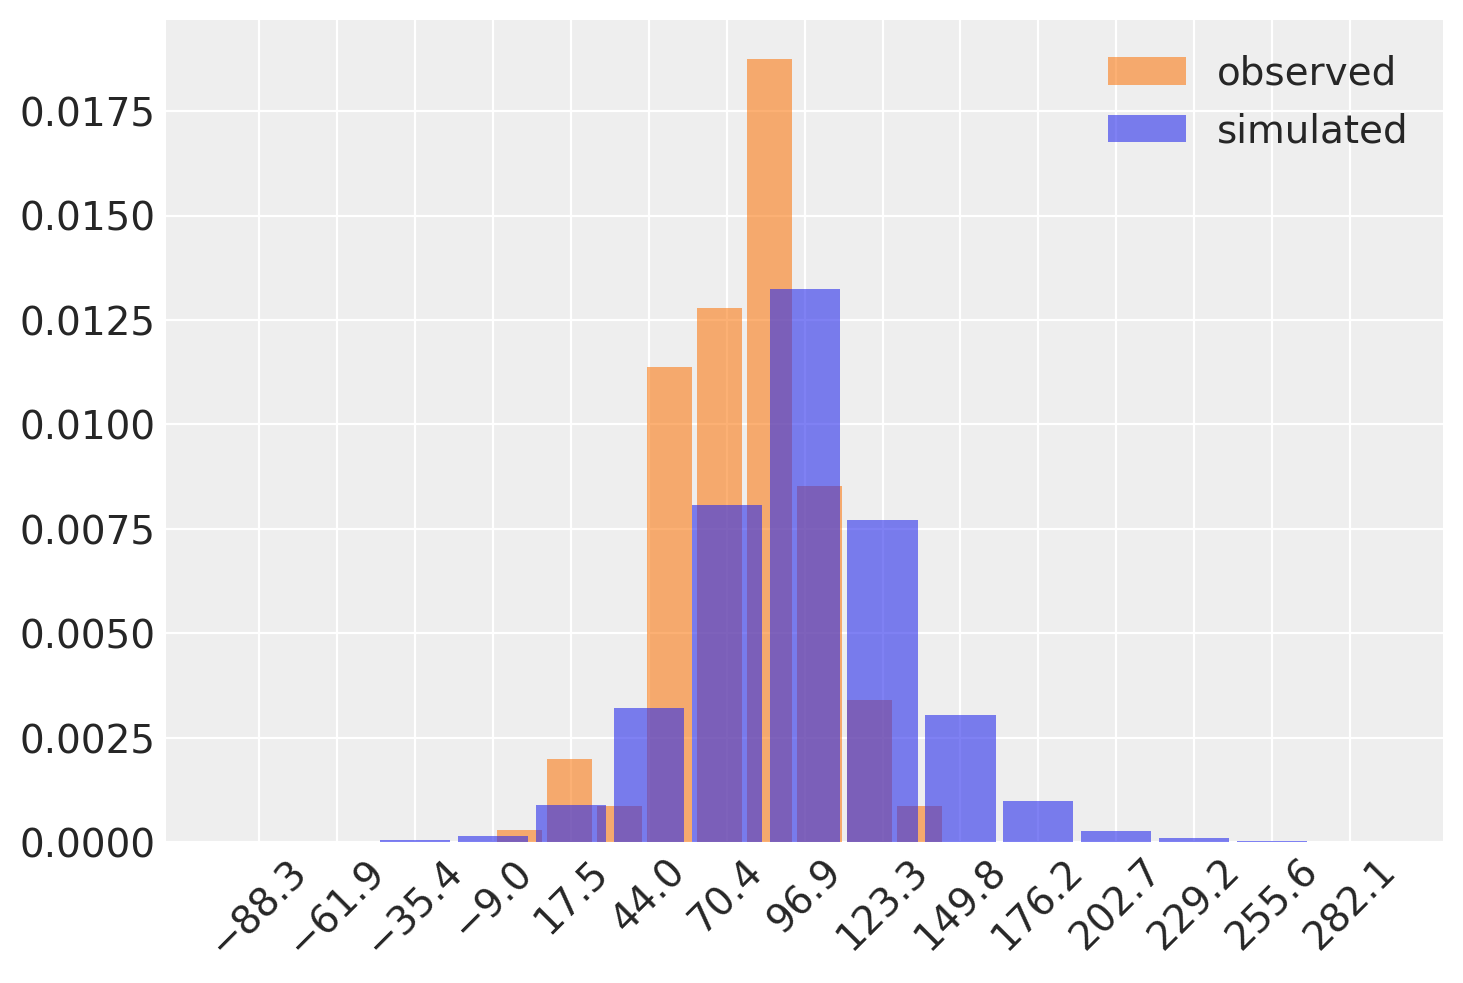

In [41]:
az.plot_dist(
    test_scores["score"].values,
    kind="hist",
    color="C1",
    hist_kwargs=dict(alpha=0.6),
    label="observed",
)
az.plot_dist(
    prior_samples.prior_predictive["scores"],
    kind="hist",
    hist_kwargs=dict(alpha=0.6),
    label="simulated",
)
plt.xticks(rotation=45);

In [42]:
with test_score_model:
    idata = pm.sample(1000, tune=2000, random_seed=42)

Sampling 4 chains, 2 divergences ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╺━━━━━  86% 0:00:06 / 0:00:35

In [43]:
with test_score_model:
    idata = pm.sample(1000, tune=2000, random_seed=42, target_accept=0.99)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, tau, lam, c2, z, beta0]


Output()

Sampling 4 chains for 2_000 tune and 1_000 draw iterations (8_000 + 4_000 draws total) took 86 seconds.


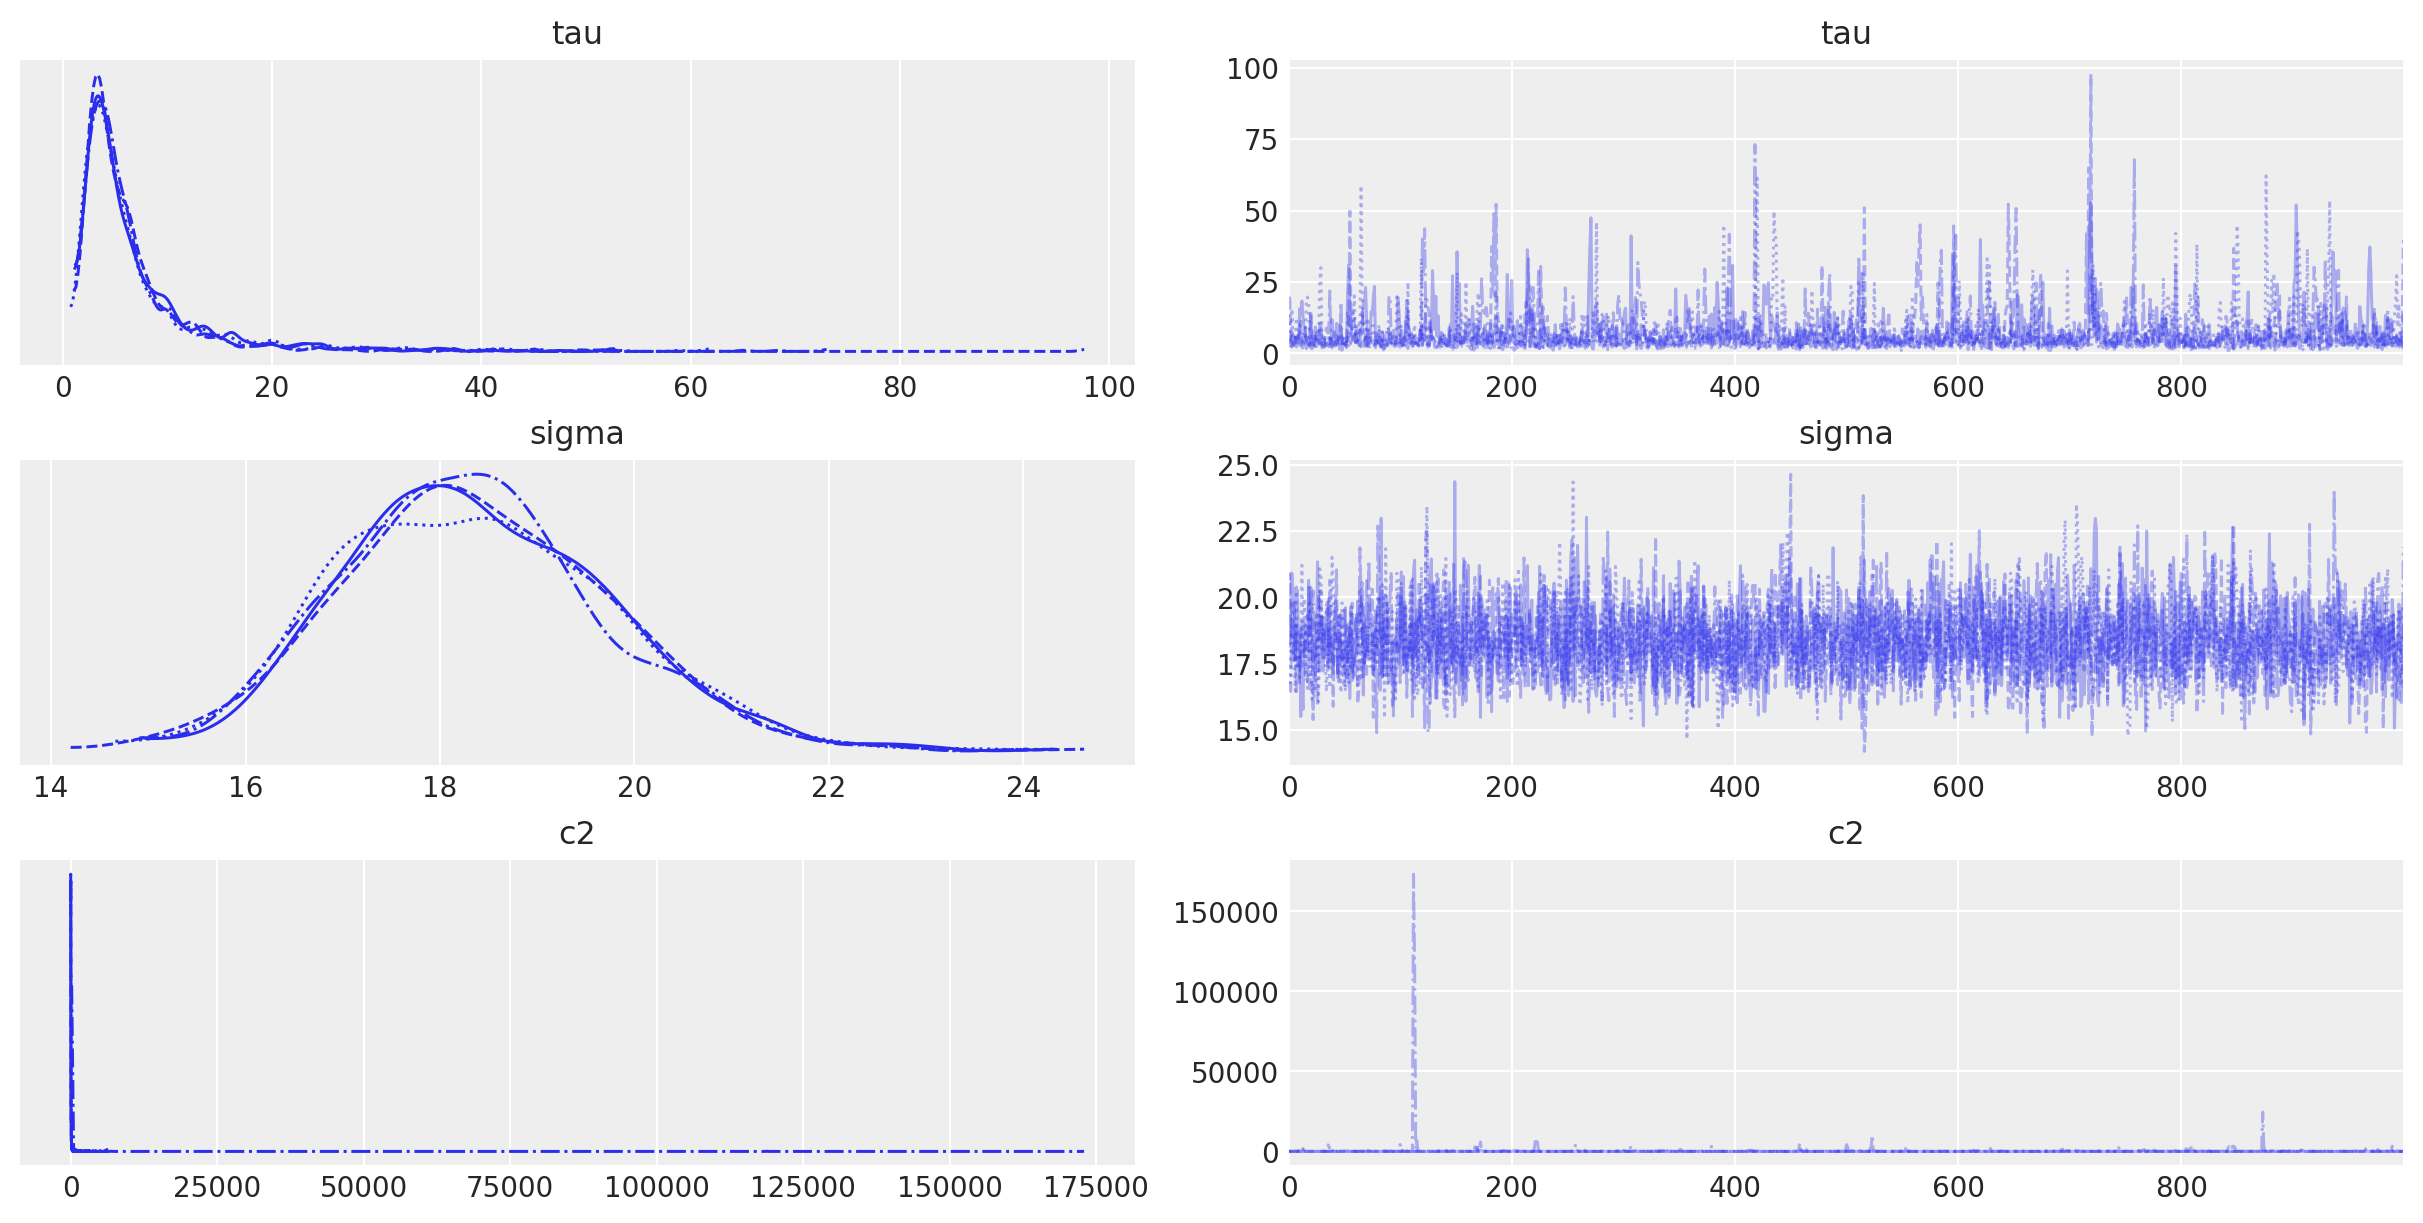

In [44]:
az.plot_trace(idata, var_names=["tau", "sigma", "c2"]);

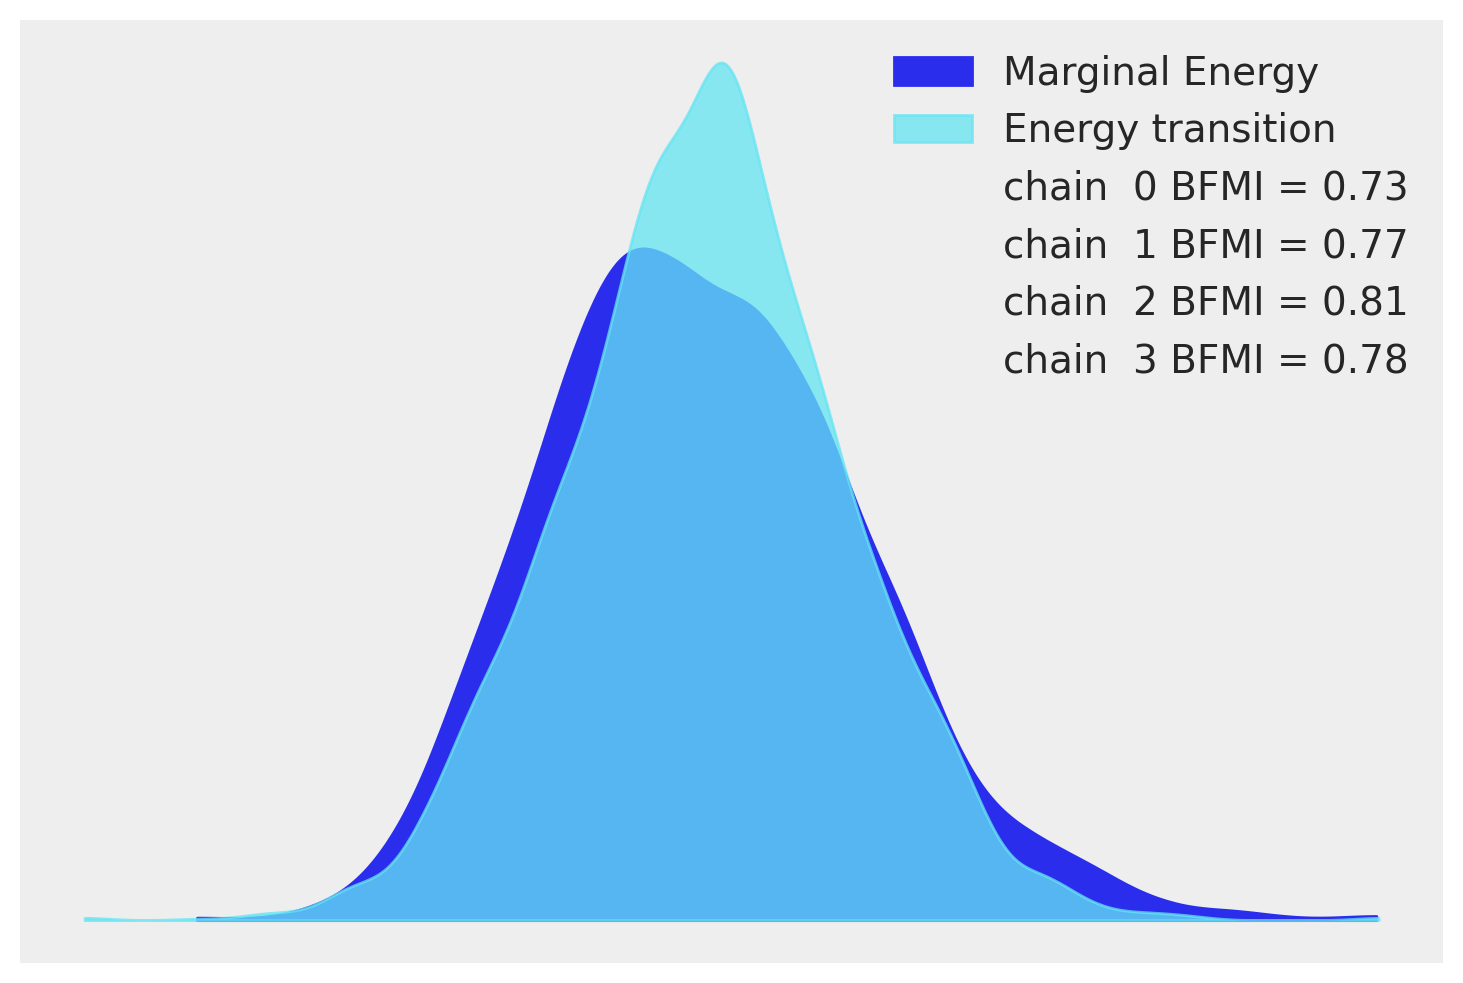

In [45]:
az.plot_energy(idata);

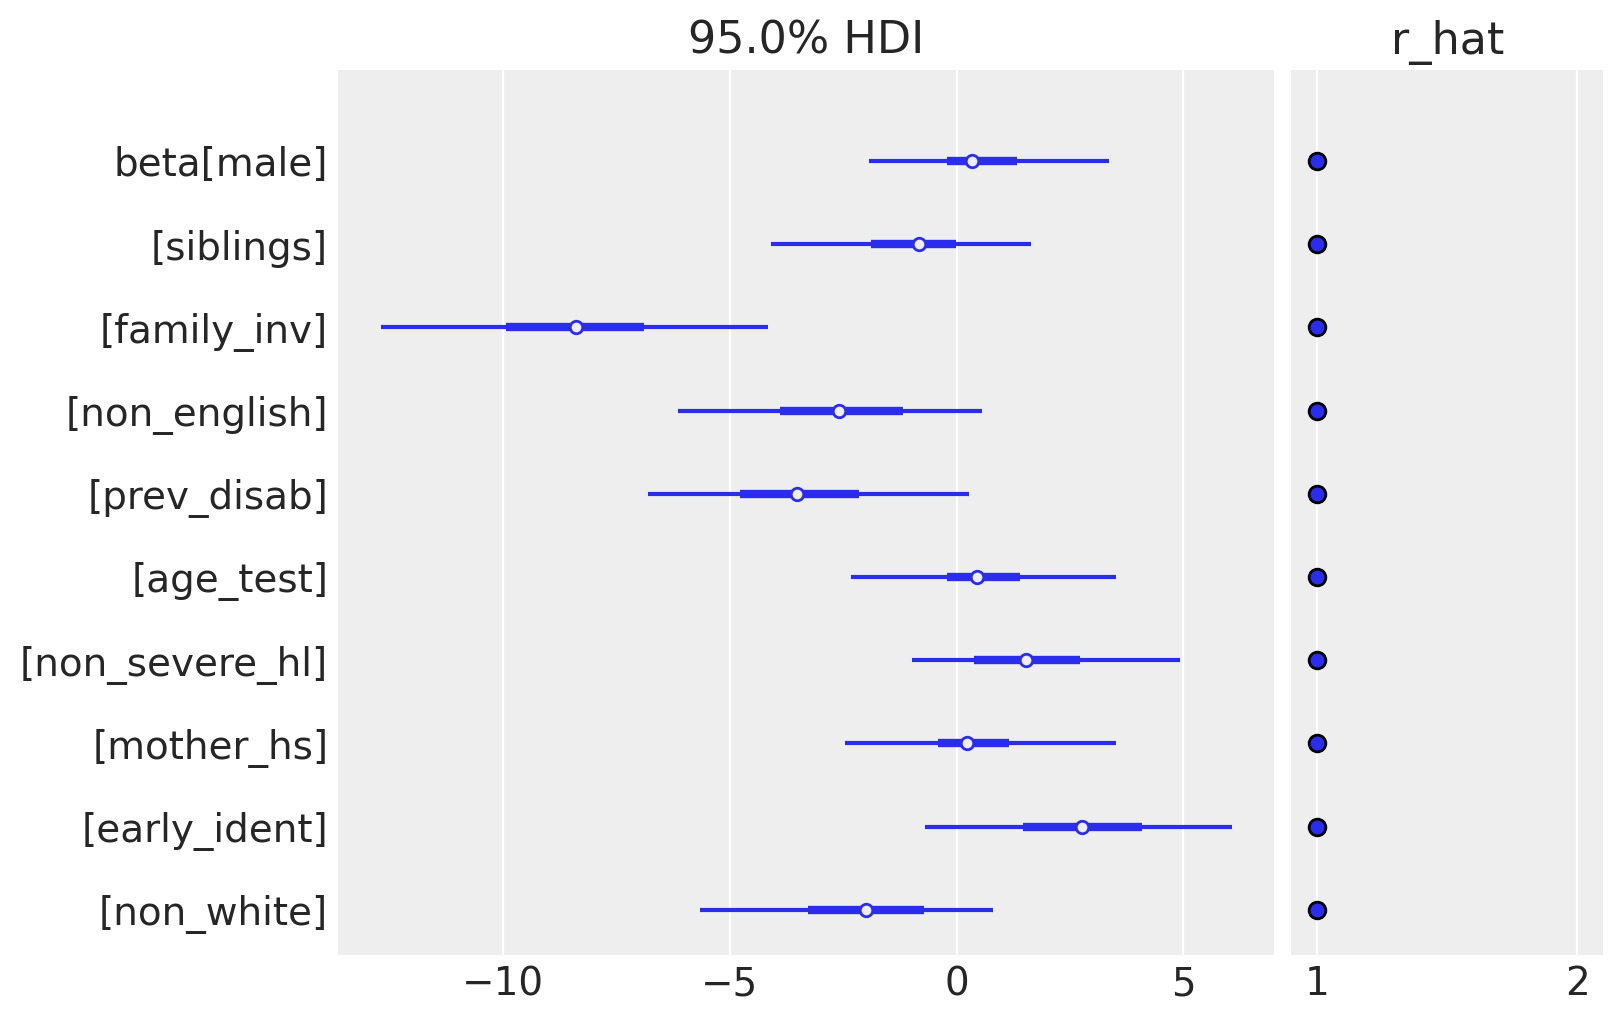

In [46]:
az.plot_forest(idata, var_names=["beta"], combined=True, hdi_prob=0.95, r_hat=True);

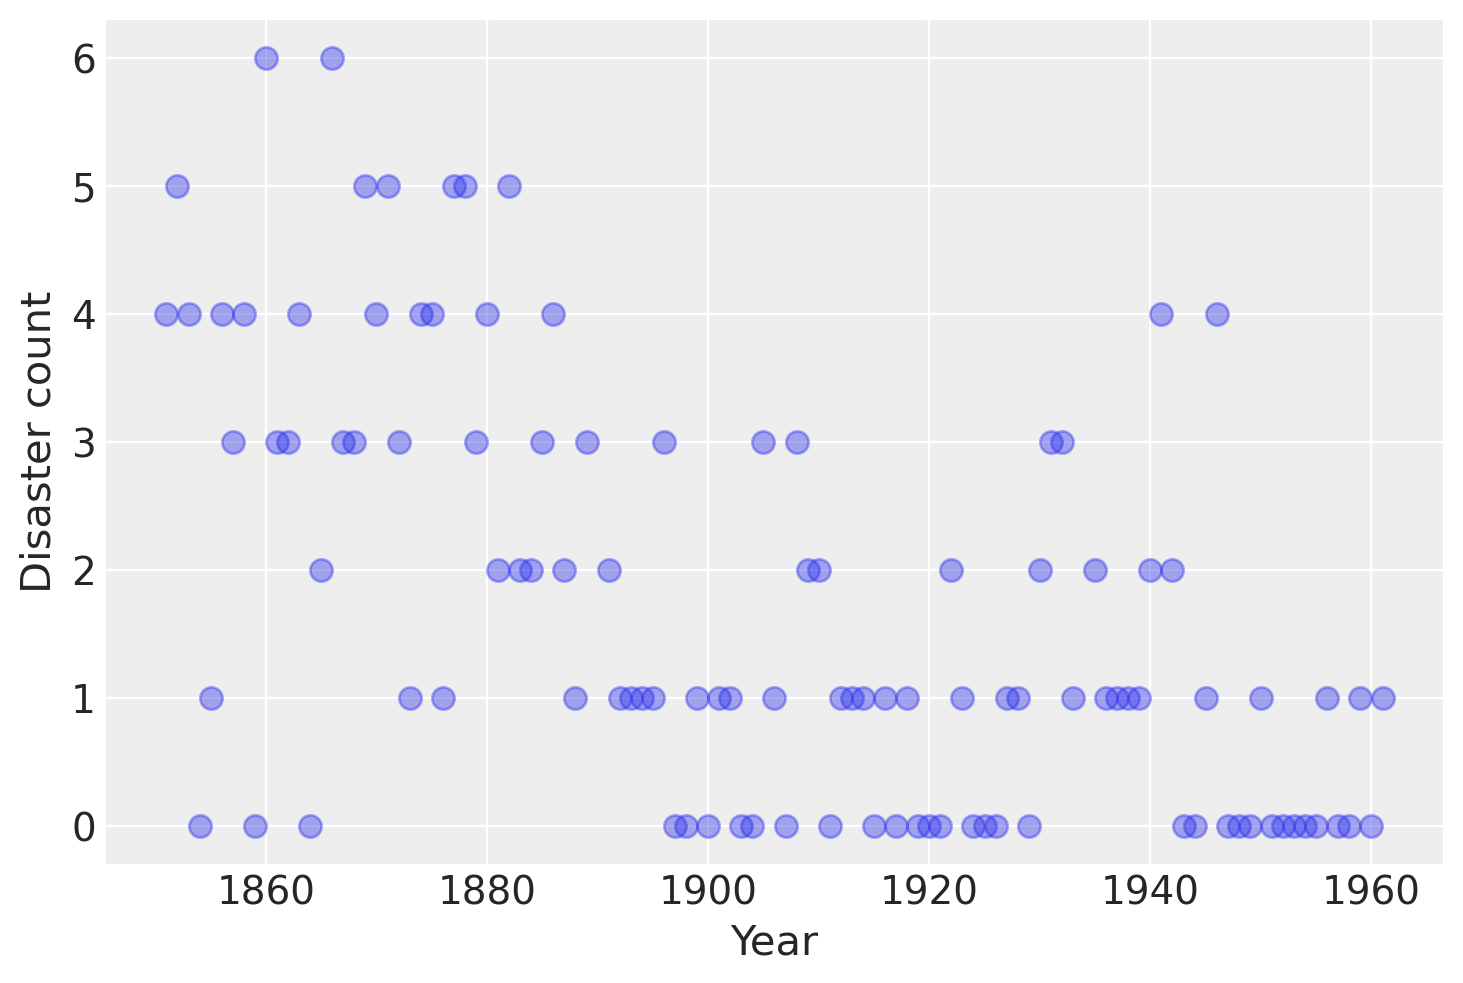

In [47]:
# fmt: off
disaster_data = pd.Series(
    [4, 5, 4, 0, 1, 4, 3, 4, 0, 6, 3, 3, 4, 0, 2, 6,
    3, 3, 5, 4, 5, 3, 1, 4, 4, 1, 5, 5, 3, 4, 2, 5,
    2, 2, 3, 4, 2, 1, 3, np.nan, 2, 1, 1, 1, 1, 3, 0, 0,
    1, 0, 1, 1, 0, 0, 3, 1, 0, 3, 2, 2, 0, 1, 1, 1,
    0, 1, 0, 1, 0, 0, 0, 2, 1, 0, 0, 0, 1, 1, 0, 2,
    3, 3, 1, np.nan, 2, 1, 1, 1, 1, 2, 4, 2, 0, 0, 1, 4,
    0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1]
)
# fmt: on
years = np.arange(1851, 1962)

plt.plot(years, disaster_data, "o", markersize=8, alpha=0.4)
plt.ylabel("Disaster count")
plt.xlabel("Year");

In [48]:
with pm.Model() as disaster_model:
    switchpoint = pm.DiscreteUniform("switchpoint", lower=years.min(), upper=years.max())

    # Priors for pre- and post-switch rates number of disasters
    early_rate = pm.Exponential("early_rate", 1.0)
    late_rate = pm.Exponential("late_rate", 1.0)

    # Allocate appropriate Poisson rates to years before and after current
    rate = pm.math.switch(switchpoint >= years, early_rate, late_rate)

    disasters = pm.Poisson("disasters", rate, observed=disaster_data)

/opt/anaconda3/lib/python3.11/site-packages/pymc/model/core.py:1342: RuntimeWarning: invalid value encountered in cast
  data = convert_observed_data(data).astype(rv_var.dtype)
/opt/anaconda3/lib/python3.11/site-packages/pymc/model/core.py:1356: ImputationWarning: Data in disasters contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)


In [49]:
with disaster_model:
    idata = pm.sample(10000)

Sampling 4 chains, 0 divergences ━━━━━━━━━━━━━━━━━━━━╺━━━━━━━━━━━━━━━━━━━  50% 0:00:58 / 0:01:02

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Sampling 4 chains, 0 divergences ━━━━━━━━━━━━━━━━━━━━━━╸━━━━━━━━━━━━━━━━━  57% 0:00:49 / 0:01:09

Sampling 4 chains, 0 divergences ━━━━━━━━━━━━━━━━━━━━━━━━━╺━━━━━━━━━━━━━━  63% 0:00:40 / 0:01:16

Sampling 4 chains, 0 divergences ━━━━━━━━━━━━━━━━━━━━━━━━━━╸━━━━━━━━━━━━━  67% 0:00:39 / 0:01:20

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Sampling 4 chains, 0 divergences ━━━━━━━━━━━━━━━━━━━━━━━━━━━╺━━━━━━━━━━━━  68% 0:00:34 / 0:01:21

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Sampling 4 chains, 0 divergences ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸━  97% 0:00:03 / 0:01:53

Sampling 4 chains for 1_000 tune and 10_000 draw iterations (4_000 + 40_000 draws total) took 145 seconds.


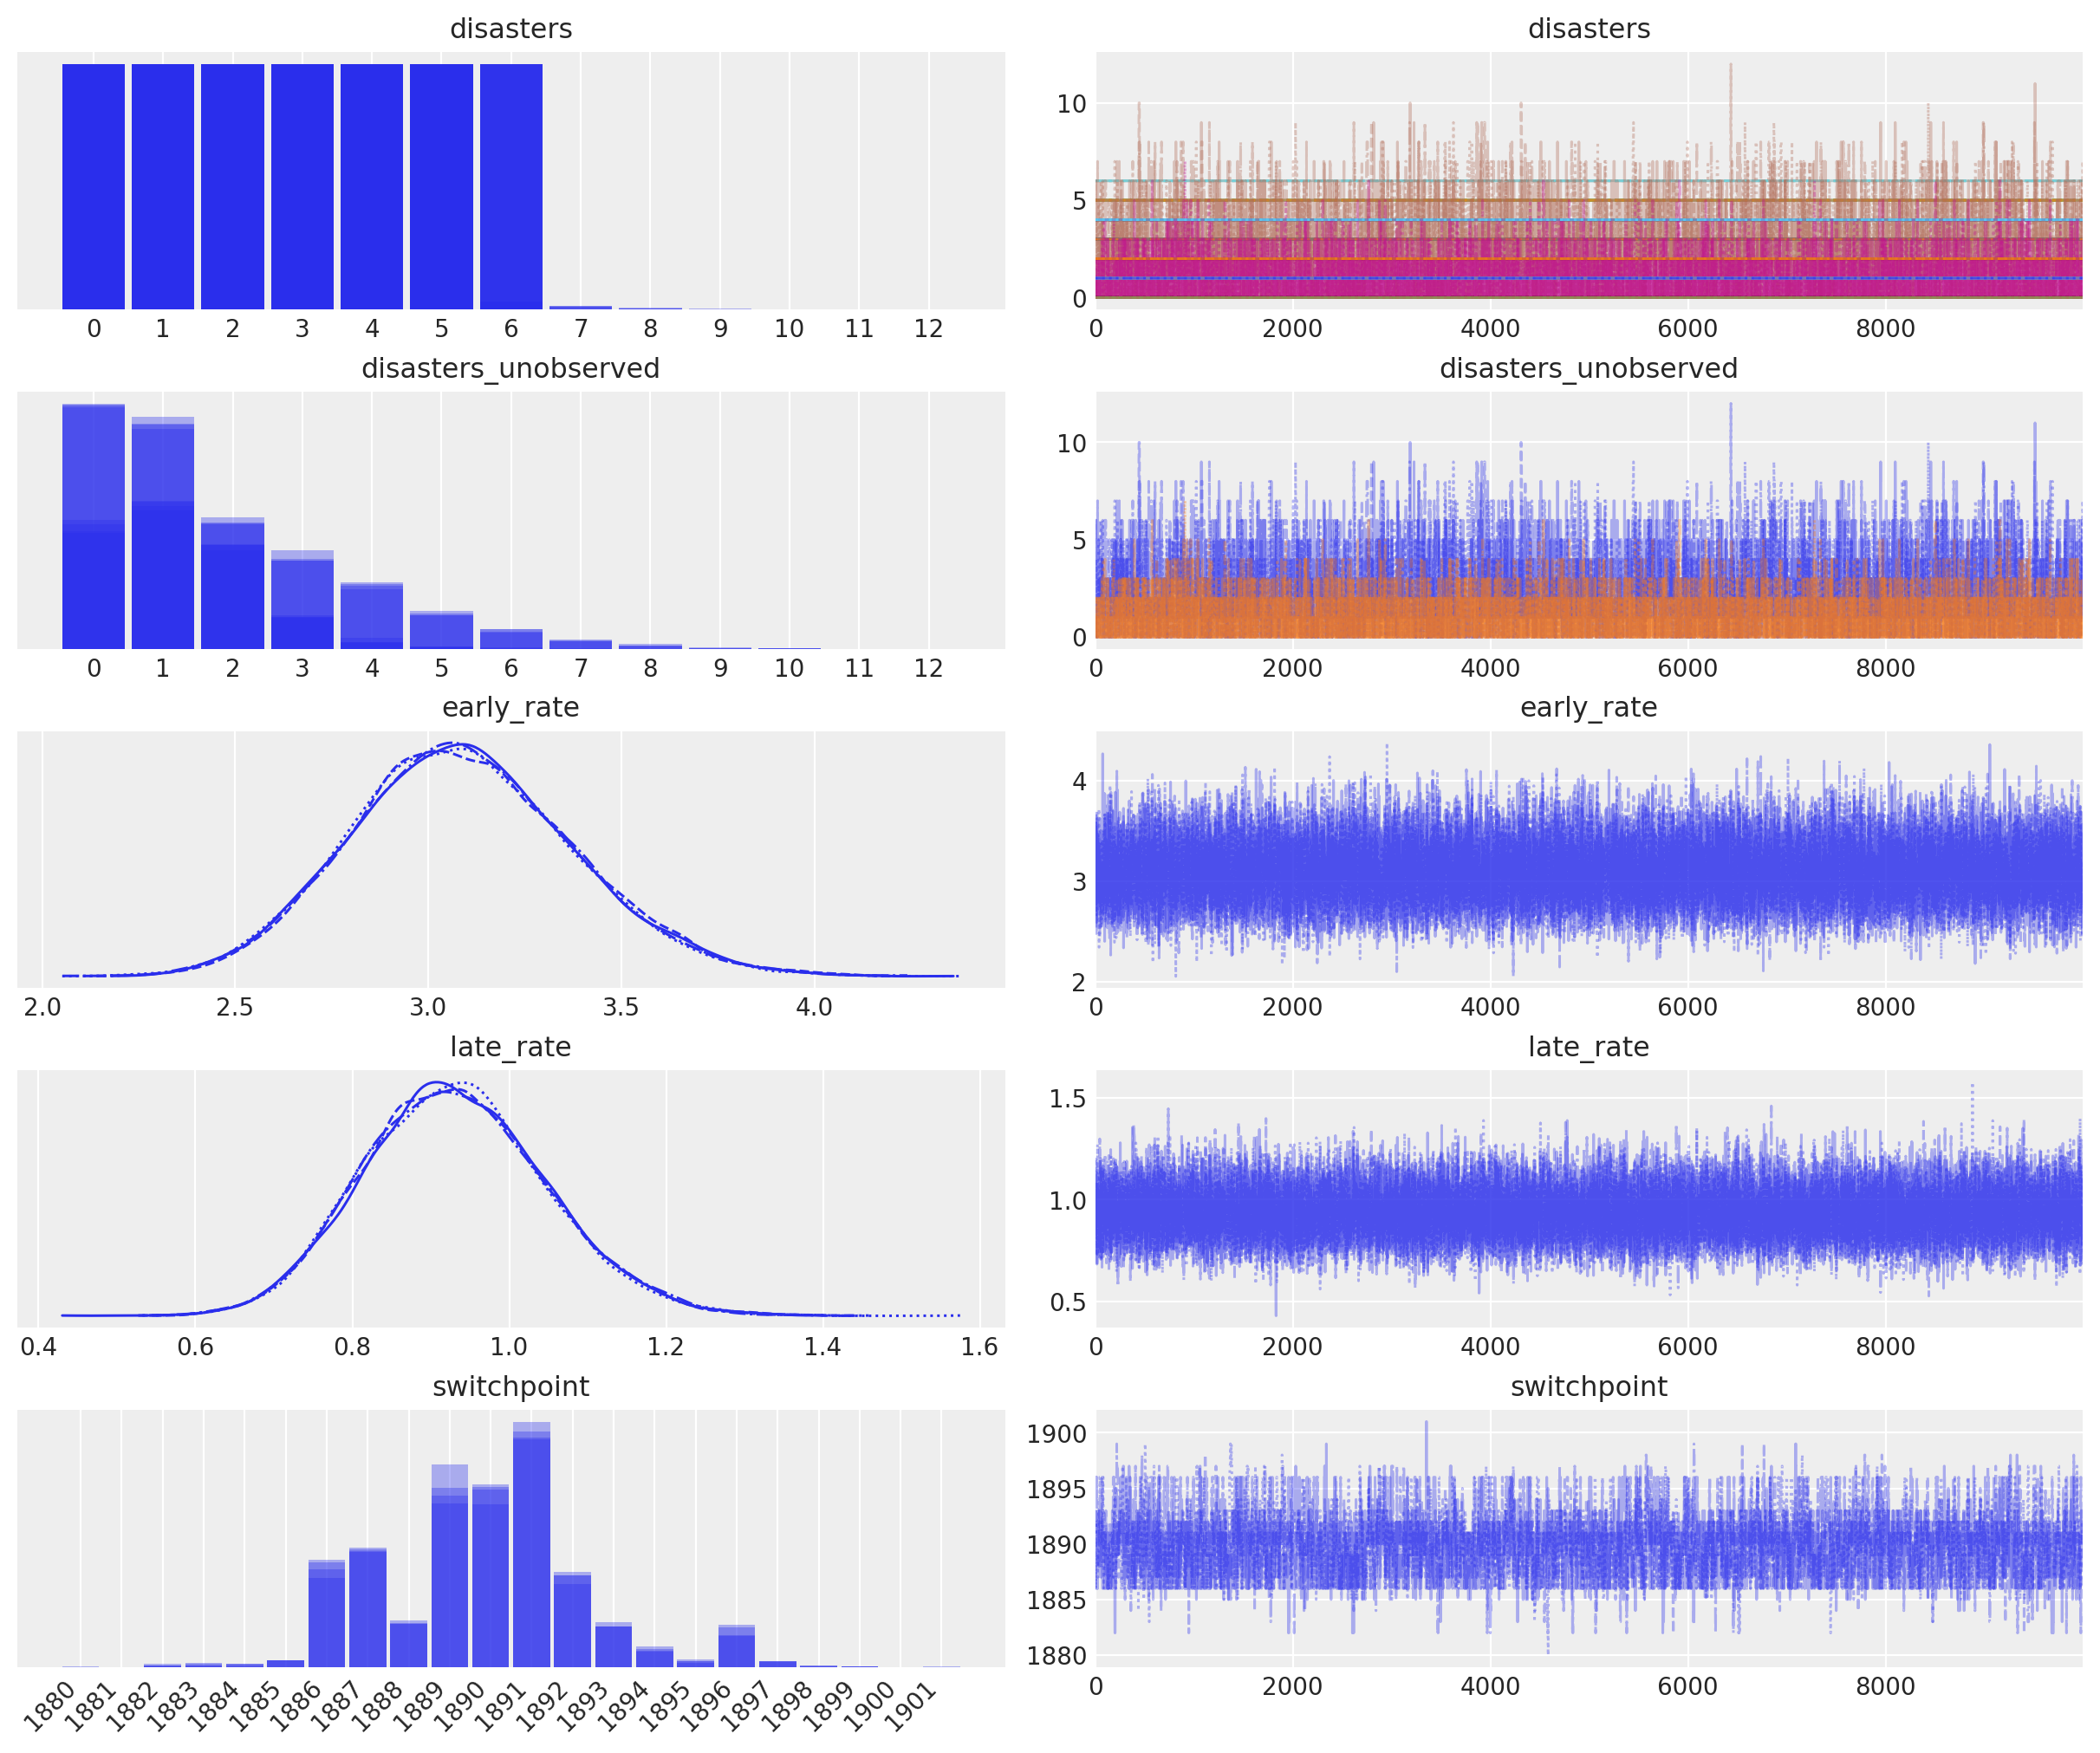

In [50]:
axes_arr = az.plot_trace(idata)
plt.draw()
for ax in axes_arr.flatten():
    if ax.get_title() == "switchpoint":
        labels = [label.get_text() for label in ax.get_xticklabels()]
        ax.set_xticklabels(labels, rotation=45, ha="right")
        break
plt.draw()

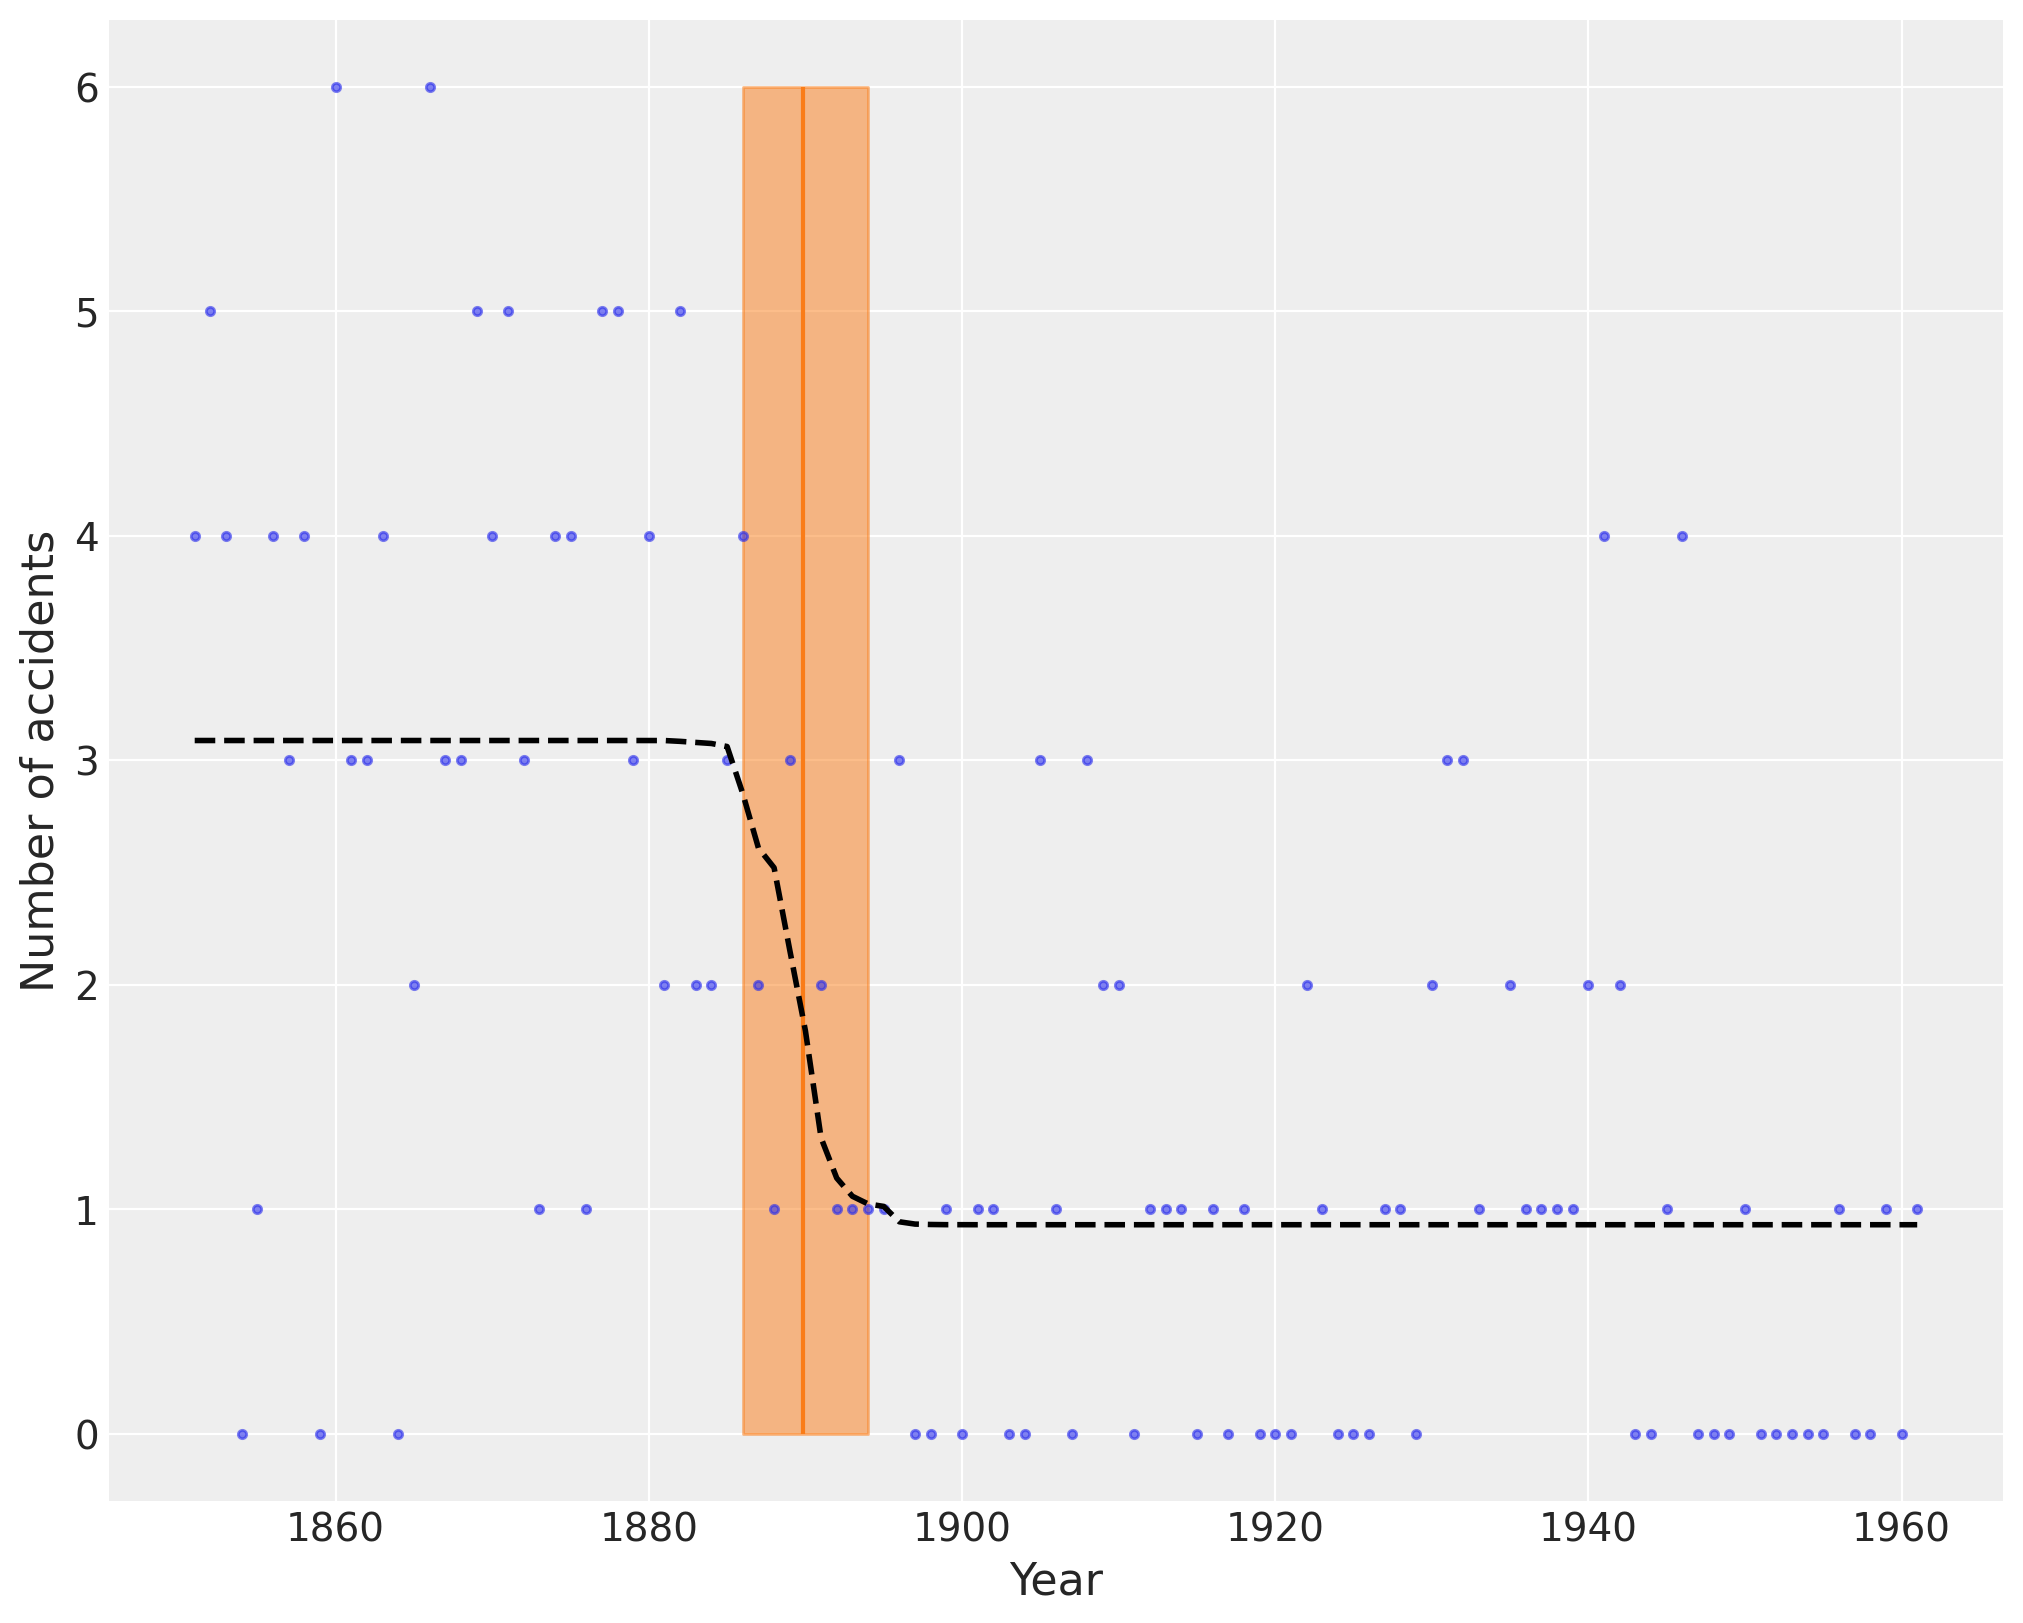

In [51]:
plt.figure(figsize=(10, 8))
plt.plot(years, disaster_data, ".", alpha=0.6)
plt.ylabel("Number of accidents", fontsize=16)
plt.xlabel("Year", fontsize=16)

trace = idata.posterior.stack(draws=("chain", "draw"))

plt.vlines(trace["switchpoint"].mean(), disaster_data.min(), disaster_data.max(), color="C1")
average_disasters = np.zeros_like(disaster_data, dtype="float")
for i, year in enumerate(years):
    idx = year < trace["switchpoint"]
    average_disasters[i] = np.mean(np.where(idx, trace["early_rate"], trace["late_rate"]))

sp_hpd = az.hdi(idata, var_names=["switchpoint"])["switchpoint"].values
plt.fill_betweenx(
    y=[disaster_data.min(), disaster_data.max()],
    x1=sp_hpd[0],
    x2=sp_hpd[1],
    alpha=0.5,
    color="C1",
)
plt.plot(years, average_disasters, "k--", lw=2);

In [52]:
from pytensor.compile.ops import as_op


@as_op(itypes=[at.lscalar], otypes=[at.lscalar])
def crazy_modulo3(value):
    if value > 0:
        return value % 3
    else:
        return (-value + 1) % 3


with pm.Model() as model_deterministic:
    a = pm.Poisson("a", 1)
    b = crazy_modulo3(a)

In [53]:
class BetaRV(at.random.op.RandomVariable):
    name = "beta"
    ndim_supp = 0
    ndims_params = []
    dtype = "floatX"

    @classmethod
    def rng_fn(cls, rng, size):
        raise NotImplementedError("Cannot sample from beta variable")


beta = BetaRV()

In [54]:
class Beta(pm.Continuous):
    rv_op = beta

    @classmethod
    def dist(cls, mu=0, **kwargs):
        mu = at.as_tensor_variable(mu)
        return super().dist([mu], **kwargs)

    def logp(self, value):
        mu = self.mu
        return beta_logp(value - mu)


def beta_logp(value):
    return -1.5 * at.log(1 + (value) ** 2)


with pm.Model() as model:
    beta = Beta("beta", mu=0)